In [33]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [35]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Acer\Desktop\Data Analysis\data\creditcard.csv")

In [36]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
data.shape

(284807, 31)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [43]:
data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

C:\Users\Acer\AppData\Local\Temp\ipykernel_9588\1051520183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='viridis')


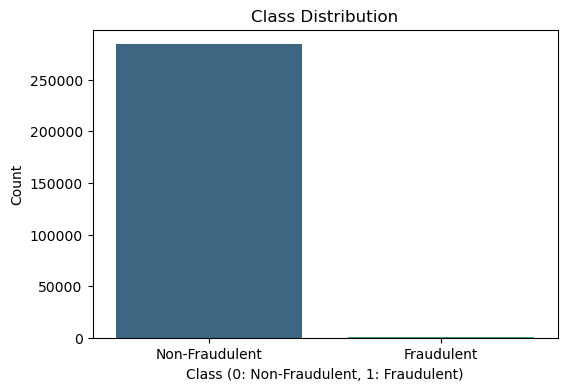

In [45]:
# some visualizations to better understand the dataset

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

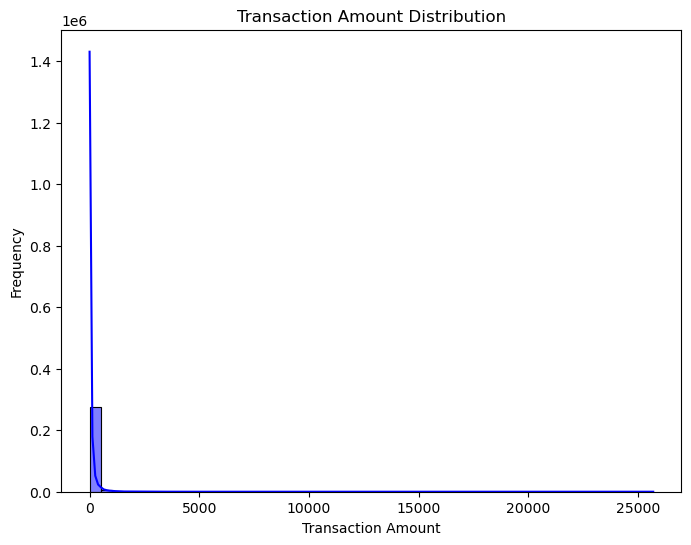

In [47]:
# Transaction Amount distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

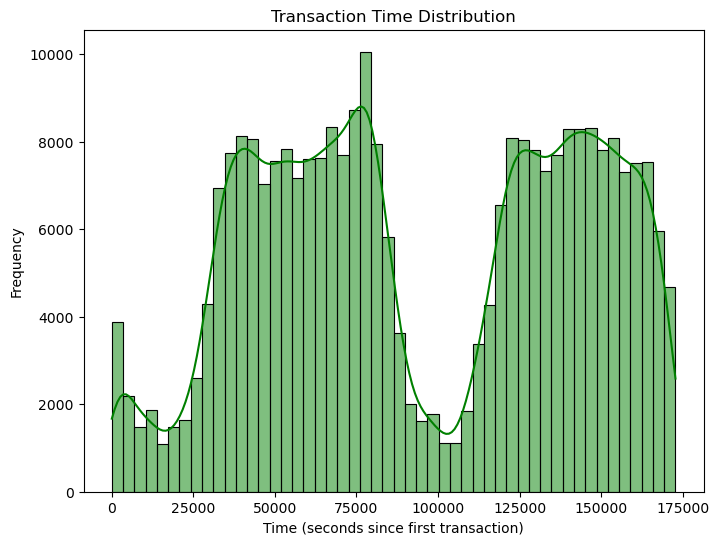

In [48]:
# Transaction Time distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Time'], bins=50, kde=True, color='green')
plt.title('Transaction Time Distribution')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Frequency')
plt.show()

In [50]:

# Preprocessing

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Scale Amount and Time columns
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

# The dataset is unbalanced, therefore, SMOTE is used to address this 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [55]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# XGBoost Model

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:46:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Area Under the Precision-Recall Curve (AUPRC): 1.00
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



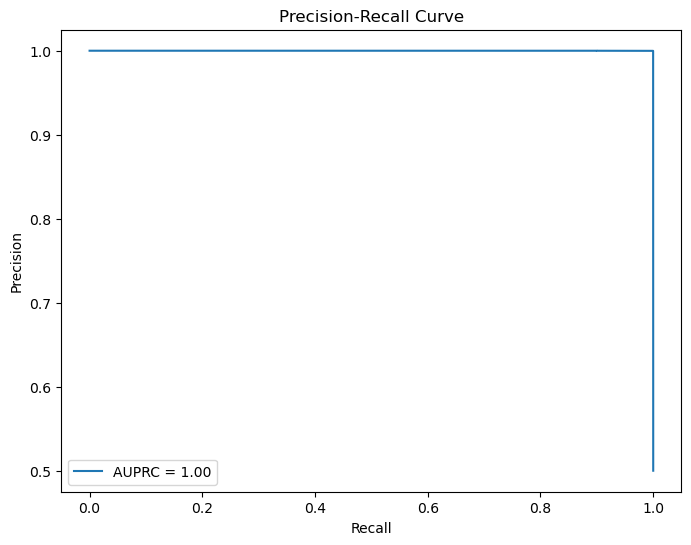

In [63]:
# Predictions
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  

# Calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute AUPRC
auprc = auc(recall, precision)
print(f"Area Under the Precision-Recall Curve (AUPRC): {auprc:.2f}")


# Use a default threshold of 0.5 to classify
y_pred = (y_pred_proba >= 0.5).astype(int)

# Classification Report
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred))


# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

Classification Report on Original Imbalanced Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.88      1.00      0.94       492

    accuracy                           1.00    284807
   macro avg       0.94      1.00      0.97    284807
weighted avg       1.00      1.00      1.00    284807



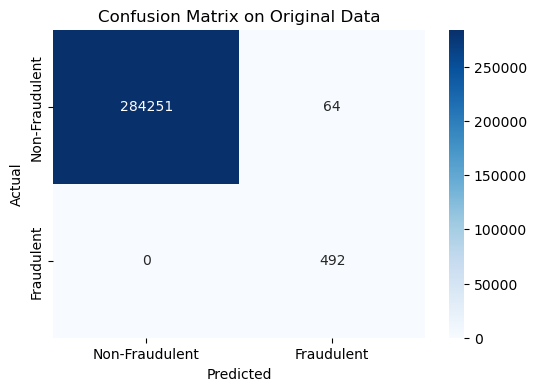

Area Under the Precision-Recall Curve (AUPRC) on Original Data: 1.00


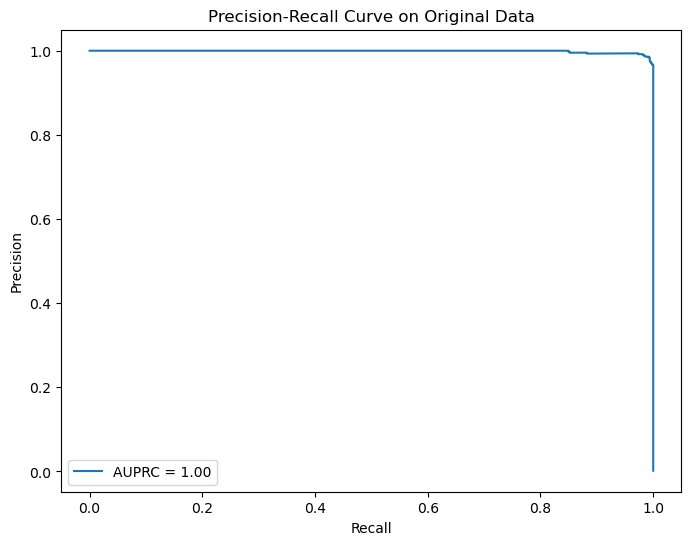

In [61]:
# Preprocessing: Scale the original data
X_original = data.drop('Class', axis=1)
y_original = data['Class']
X_original[['Amount', 'Time']] = scaler.transform(X_original[['Amount', 'Time']])

# Predictions on the original dataset
y_original_pred_proba = xgb_model.predict_proba(X_original)[:, 1]
y_original_pred = (y_original_pred_proba >= 0.5).astype(int)  # Default threshold = 0.5

# Classification Report
print("Classification Report on Original Imbalanced Data:\n")
print(classification_report(y_original, y_original_pred))

# Confusion Matrix
conf_matrix_original = confusion_matrix(y_original, y_original_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix on Original Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate Precision-Recall Curve and AUPRC
precision_original, recall_original, _ = precision_recall_curve(y_original, y_original_pred_proba)
auprc_original = auc(recall_original, precision_original)
print(f"Area Under the Precision-Recall Curve (AUPRC) on Original Data: {auprc_original:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_original, precision_original, label=f'AUPRC = {auprc_original:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')


plt.title('Precision-Recall Curve on Original Data')
plt.legend()
plt.show()

In [65]:
# Save model

import joblib

model_path = r"C:\Users\Acer\Desktop\Data Analysis\data\xgb_fraud_model.joblib"

joblib.dump(xgb_model, model_path)

print(f"Model saved successfully at {model_path}")


Model saved successfully at C:\Users\Acer\Desktop\Data Analysis\data\xgb_fraud_model.joblib


In [71]:
# Model 
model_path = r"C:\Users\Acer\Desktop\Data Analysis\data\xgb_fraud_model.joblib"
xgb_model_loaded = joblib.load(model_path)
print("Model loaded successfully!")

# Scaler
scaler_path = r"C:\Users\Acer\Desktop\Data Analysis\data\scaler.joblib"

# Save the scaler
joblib.dump(scaler, scaler_path)

print(f"Scaler saved successfully at {scaler_path}")

# Load the scaler
scaler_loaded = joblib.load(scaler_path)
print("Scaler loaded successfully!")


Model loaded successfully!
Scaler saved successfully at C:\Users\Acer\Desktop\Data Analysis\data\scaler.joblib
Scaler loaded successfully!
